In [2]:
import numpy as np
import pandas as pd
pd.set_option("display.date_dayfirst", True)
pd.set_option("display.date_yearfirst", False)
#pd.describe_option('display.date_yearfirst')
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.mlab as mlab

import matplotlib.pylab as pylab

Set file to look at containing data

#Import excel file into pandas dataframe

In [3]:
mainpath = 'C:/Users/mb22/OneDrive/PhD/Quasar Shared/'
filepath = 'Data/NPL_Table_All.xlsx'

fullpath=mainpath+filepath
print(fullpath)

all_data = pd.read_excel(fullpath, parse_dates=['Date'])
all_data.head()

C:/Users/mb22/OneDrive/PhD/Quasar Shared/Data/NPL_Table_All.xlsx


,Centre,Postcode,Region,Group,Date,Type,Energy,BeamQualRatio,BeamQualError,OPRatio,OPError,IntercompRatio,IntercompError,Comments
0,Aberdeen Royal Infirmary,AB25 2ZN,A,1,2007-02-09,MV,6,0.993,0.15,1.005,0.1,0.992,0.4,Measured result (1.003 from tabulated data)
1,Aberdeen Royal Infirmary,AB25 2ZN,A,1,2007-02-09,MV,15,0.995,0.15,1.008,0.1,0.991,0.4,NaN
2,Aberdeen Royal Infirmary,AB25 2ZN,A,1,2007-02-10,MeV,4,0.010,0.20,0.998,0.2,1.001,0.4,NaN
3,Aberdeen Royal Infirmary,AB25 2ZN,A,1,2007-02-10,MeV,6,0.020,0.20,1.003,0.2,1.002,0.4,NaN
4,Aberdeen Royal Infirmary,AB25 2ZN,A,1,2007-02-10,MeV,9,0.030,0.20,1.003,0.2,1.001,0.4,NaN


#Calculate some stats & check data types

In [4]:
mean = np.mean(all_data) # this needs to be energy specific
sd = np.std(all_data)

all_data.describe()
#all_data.dtypes

,Group,Energy,BeamQualRatio,BeamQualError,OPRatio,OPError,IntercompRatio,IntercompError
count,270.000000,270.000000,234.000000,153.000000,270.000000,270.000000,237.000000,2.370000e+02
mean,4.285185,26.933333,0.541562,0.619935,0.999214,0.248889,1.000071,4.000000e-01
std,2.517626,53.297677,0.512439,0.940383,0.008921,0.148470,0.006840,1.097410e-08
min,1.000000,4.000000,-0.280000,0.150000,0.976000,0.100000,0.958000,4.000000e-01
25%,2.000000,6.000000,0.000000,0.200000,0.994000,0.200000,0.997000,4.000000e-01
50%,4.500000,10.000000,0.992000,0.200000,0.999000,0.200000,1.001000,4.000000e-01
75%,6.000000,15.000000,0.999750,0.300000,1.005000,0.200000,1.004000,4.000000e-01
max,9.000000,300.000000,1.077000,5.000000,1.027000,0.800000,1.017000,4.000000e-01


#Create seperate dataframes for MV, MeV and kV

In [5]:
#beam_types = all_data.groupby('Type')
#beam_types.mean()

df2 = all_data.copy()
mv_data = df2[df2['Type'].isin(['MV'])]
mev_data = df2[df2['Type'].isin(['MeV'])]
kv_data = df2[df2['Type'].isin(['kV'])]
df3 = mev_data.copy()
mev_data_notg5 = df3[~df3['Centre'].str.contains('CPUK')]
mev_data_notg5
#mv_data.describe()
#mev_data.describe()
#kv_data.describe()

,Centre,Postcode,Region,Group,Date,Type,Energy,BeamQualRatio,BeamQualError,OPRatio,OPError,IntercompRatio,IntercompError,Comments
2,Aberdeen Royal Infirmary,AB25 2ZN,A,1,2007-02-10,MeV,4,0.01,0.2,0.9980,0.2,1.001,0.4,NaN
3,Aberdeen Royal Infirmary,AB25 2ZN,A,1,2007-02-10,MeV,6,0.02,0.2,1.0030,0.2,1.002,0.4,NaN
4,Aberdeen Royal Infirmary,AB25 2ZN,A,1,2007-02-10,MeV,9,0.03,0.2,1.0030,0.2,1.001,0.4,NaN
5,Aberdeen Royal Infirmary,AB25 2ZN,A,1,2007-02-10,MeV,12,0.05,0.2,0.9990,0.2,1.001,0.4,NaN
6,Aberdeen Royal Infirmary,AB25 2ZN,A,1,2007-02-10,MeV,16,-0.01,0.2,1.0020,0.2,1.002,0.4,NaN
27,Edinburgh Cancer Centre,EH4 2XU,A,1,2008-10-14,MeV,6,-0.06,0.2,0.9960,0.2,1.003,0.4,NaN
28,Edinburgh Cancer Centre,EH4 2XU,A,1,2008-10-14,MeV,9,-0.08,0.2,1.0150,0.2,1.003,0.4,NaN
29,Edinburgh Cancer Centre,EH4 2XU,A,1,2008-10-14,MeV,12,-0.07,0.2,1.0240,0.2,1.013,0.4,NaN
30,Edinburgh Cancer Centre,EH4 2XU,A,1,2008-10-14,MeV,16,-0.16,0.2,1.0210,0.2,0.994,0.4,NaN
31,Edinburgh Cancer Centre,EH4 2XU,A,1,2008-10-14,MeV,20,-0.27,0.2,1.0270,0.2,0.996,0.4,NaN


#Make some quick graphs

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x05B1D350>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x05C075F0>]], dtype=object)

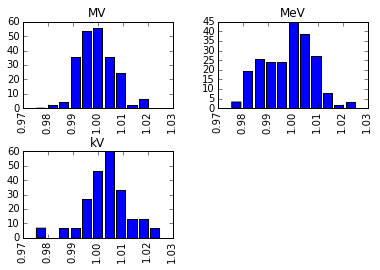

In [6]:
from decimal import * # decimal means that more exact maths can be done with a specified precision.
getcontext().prec = 28
range_lower = Decimal('0.975')
range_upper = Decimal('1.025')
bin_width = Decimal('0.005')
number_bins = (range_upper-range_lower)/bin_width + 1

all_data['OPRatio'].hist(by=all_data['Type'], normed=True, bins=11, range=(0.975,1.025), rwidth=0.8) #simple auto plot in a grid

#Histograms

##Ideally make into a function and feed data frame, title, filename

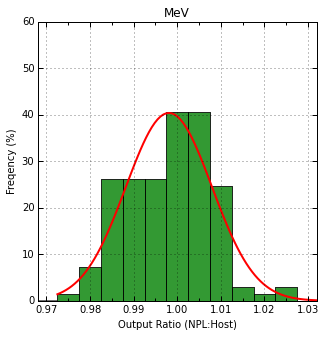

In [11]:
pylab.rcParams['figure.figsize'] = 5, 5 # change size of figures

from matplotlib.ticker import AutoMinorLocator

fig = plt.figure()
axes = fig.add_subplot(1,1,1)
plt.title('MeV')
plt.xlabel("Output Ratio (NPL:Host)")
plt.ylabel("Freqency (%)")
plt.xlim(0.968, 1.032)
plt.ylim(0, 60)

mev_data['OPRatio'].hist(bins=14, range=(0.9675, 1.0375), normed=True,
                               facecolor = 'green', alpha = 0.8, ax=axes, rwidth=1)

axes.xaxis.set_minor_locator(AutoMinorLocator(2)) #used to set the number of minor ticks between major ticks
plt.tick_params(which='major', width=1, length=5)
plt.tick_params(which='minor', width=1, length=3)
plt.grid(True, which='major')

mean = mev_data['OPRatio'].mean()
sd = mev_data['OPRatio'].std()

x = np.linspace(0.9725, 1.0375, 100) # add normal distibution fit
plt.plot(x, mlab.normpdf(x,mean,sd), linewidth = 2, color='red')

#plt.savefig('NPL_Paper_Plots/NPL_kV_Hist_Fit2.png', bbox_inches='tight', dpi=300)

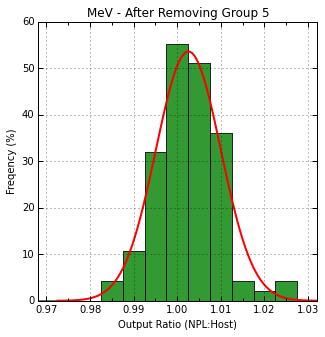

In [13]:
# to take out 'Group 5' MeV Data

pylab.rcParams['figure.figsize'] = 5, 5 # change size of figures

from matplotlib.ticker import AutoMinorLocator

fig = plt.figure()
axes = fig.add_subplot(1,1,1)
plt.title('MeV - After Removing Group 5')
plt.xlabel("Output Ratio (NPL:Host)")
plt.ylabel("Freqency (%)")
plt.xlim(0.968, 1.032)
plt.ylim(0, 60)

mev_data_notg5['OPRatio'].hist(bins=14, range=(0.9675, 1.0375), normed=True,
                               facecolor = 'green', alpha = 0.8, ax=axes, rwidth=1)

axes.xaxis.set_minor_locator(AutoMinorLocator(2)) #used to set the number of minor ticks between major ticks
plt.tick_params(which='major', width=1, length=5)
plt.tick_params(which='minor', width=1, length=3)
plt.grid(True, which='major')

mean = mev_data_notg5['OPRatio'].mean()
sd = mev_data_notg5['OPRatio'].std()

x = np.linspace(0.9725, 1.0375, 100) # add normal distibution fit
plt.plot(x, mlab.normpdf(x,mean,sd), linewidth = 2, color='red')

#plt.savefig('NPL_Paper_Plots/NPL_MeV_NotG5_Hist_Fit.png', bbox_inches='tight', dpi=300)

#Get some more stats such as Mean, SD, Skew etc.

In [7]:
print('Skew')
print('All: ', all_data['OPRatio'].skew())
print('MV: ', mv_data['OPRatio'].skew())
print('MeV: ', mev_data['OPRatio'].skew())
print('kV: ', kv_data['OPRatio'].skew())
print()
print('SEM')
print('MV: ', mv_data['OPRatio'].sem())
print('MeV: ', mev_data['OPRatio'].sem())
print('kV: ', kv_data['OPRatio'].sem())
print()
print('Mean')
print('MV: ', mv_data['OPRatio'].mean())
print('MeV: ', mev_data['OPRatio'].mean())
print('kV: ', kv_data['OPRatio'].mean())
print()
print('SD')
print('MV: ', mv_data['OPRatio'].std())
print('MeV: ', mev_data['OPRatio'].std())
print('kV: ', kv_data['OPRatio'].std())

Skew
All:  0.0450005698521
MV:  0.555154096336
MeV:  0.0776448267147
kV:  -0.523112614656

SEM
MV:  0.000690420246376
MeV:  0.000840605919258
kV:  0.00158713477249

Mean
MV:  0.999378597441
MeV:  0.998089855072
kV:  1.00342424242

SD
MV:  0.00686959471469
MeV:  0.00987488364417
kV:  0.00911739512906


#Plot of All Audits

In [8]:
# Calculate rolling SD of 20 values

mv_data_datesort = mv_data.sort(['Date', 'Energy'], ascending=True) #Sort by date and energy and put into new dataframe
#mv_data_datesort.append('SD_Prev20')

mv_data_datesort['SD_Prev20'] = np.nan
mv_data_datesort['SD_Prev20'] = pd.rolling_std(mv_data_datesort['OPRatio'],window=20)
mv_data_datesort.tail()

,Centre,Postcode,Region,Group,Date,Type,Energy,BeamQualRatio,BeamQualError,OPRatio,OPError,IntercompRatio,IntercompError,Comments,SD_Prev20
22,Edinburgh Cancer Centre,EH4 2XU,A,1,2015-02-10,MV,6,1.005,0.2,0.999,0.2,1.001,0.4,NaN,0.004056
23,Edinburgh Cancer Centre,EH4 2XU,A,1,2015-02-10,MV,6,1.005,0.2,0.999,0.2,1.002,0.4,FFF,0.003734
24,Edinburgh Cancer Centre,EH4 2XU,A,1,2015-02-10,MV,10,1.002,0.2,0.999,0.2,1.000,0.4,NaN,0.003818
25,Edinburgh Cancer Centre,EH4 2XU,A,1,2015-02-10,MV,10,1.005,0.2,0.996,0.2,0.999,0.4,FFF,0.003631
26,Edinburgh Cancer Centre,EH4 2XU,A,1,2015-02-10,MV,15,1.003,0.2,0.995,0.2,0.997,0.4,NaN,0.003631


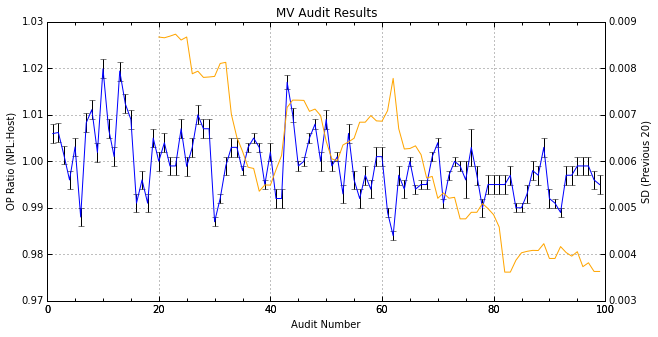

In [9]:
pylab.rcParams['figure.figsize'] = 10, 5 # change size of figures
fig1 = plt.figure()
axes1 = fig1.add_subplot(1,1,1)
plt.title('MV Audit Results')
plt.xlabel("Audit Number")
plt.ylabel("OP Ratio (NPL:Host)")
plt.ylim(0.97, 1.03)
axes1.xaxis.set_minor_locator(AutoMinorLocator(4)) #used to set the number of minor ticks between major ticks
plt.tick_params(which='major', width=1, length=5)
plt.tick_params(which='minor', width=1, length=3)
plt.grid(True, which='major')

x=np.arange(1,mv_data_datesort['OPRatio'].count()+1)
y=mv_data_datesort['OPRatio']
yerr=(mv_data_datesort['OPError']*mv_data_datesort['OPRatio'])/100

ysd=mv_data_datesort['SD_Prev20']

plt.errorbar(x, y, yerr=yerr, ecolor='black')
axes2=fig1.add_subplot(111, sharex=axes1, frameon=False)
axes2.yaxis.tick_right()
axes2.yaxis.set_label_position('right')
#plt.ylim(0, 0.012)
plt.ylabel("SD (Previous 20)")
line2=axes2.plot(x,ysd, color='orange')

plt.savefig('NPL_Paper_Plots/NPL_MV_All_SD.png', bbox_inches='tight', dpi=300)

In [10]:
df3 = mv_data.copy()
df3.groupby('Region')
df3.mean()


Group             4.070707
Energy            8.515152
BeamQualRatio     0.998732
BeamQualError     0.202525
OPRatio           0.999379
OPError           0.173737
IntercompRatio    0.999662
IntercompError    0.400000
dtype: float64

Want to do the below with it split into groups, and also split into 5 year periods to see the variation with time. (Similar to Palmer paper...)

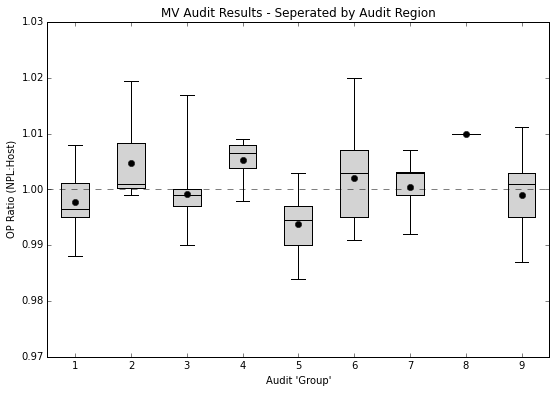

In [13]:
# extract only Groups and OPRatio to allow simple box plot production 
#mv = mv_data_datesort[['Group', 'OPRatio']]

# make a numpy array to use rather than pandas?
#g = np.array(mv_data_datesort['Group'])
#op = np.array(mv_data_datesort['OPRatio'])

g1 = mv_data_datesort.loc[mv_data_datesort['Group']==1, ['OPRatio']]
g2 = mv_data_datesort.loc[mv_data_datesort['Group']==2, ['OPRatio']]
g3 = mv_data_datesort.loc[mv_data_datesort['Group']==3, ['OPRatio']]
g4 = mv_data_datesort.loc[mv_data_datesort['Group']==4, ['OPRatio']]
g5 = mv_data_datesort.loc[mv_data_datesort['Group']==5, ['OPRatio']]
g6 = mv_data_datesort.loc[mv_data_datesort['Group']==6, ['OPRatio']]
g7 = mv_data_datesort.loc[mv_data_datesort['Group']==7, ['OPRatio']]
g8 = mv_data_datesort.loc[mv_data_datesort['Group']==8, ['OPRatio']]
g9 = mv_data_datesort.loc[mv_data_datesort['Group']==9, ['OPRatio']]

grouped=[g1,g2,g3,g4,g5,g6,g7,g8,g9] # this should be able to be done a bit easier without splitting it all up first.

fig = plt.figure(1, figsize=(9,6))

ax = fig.add_subplot(111)

bp = ax.boxplot(grouped, whis='range', patch_artist=True, showmeans=True)
plt.plot([-1,10],[1,1], linestyle='--', color='black', alpha=0.5) #add line at OPRatio=1
plt.title('MV Audit Results - Seperated by Audit Region')
plt.xlabel("Audit 'Group'")
plt.ylabel("OP Ratio (NPL:Host)")
plt.ylim(0.97,1.03)

for box in bp['boxes']:
    box.set(facecolor='lightgrey')
    
for whisker in bp['whiskers']:
    whisker.set(linestyle='-', color='black') 
    
for median in bp['medians']:
    median.set(color='black')
    
for mean in bp['means']:
    mean.set(marker='o', color='black', markerfacecolor='black')
    
#plt.savefig('NPL_Paper_Plots/NPL_MV_All_Groups.png', bbox_inches='tight', dpi=300)

Plot all groups OP data as a sort of scatter plot (rather than use box plot?)

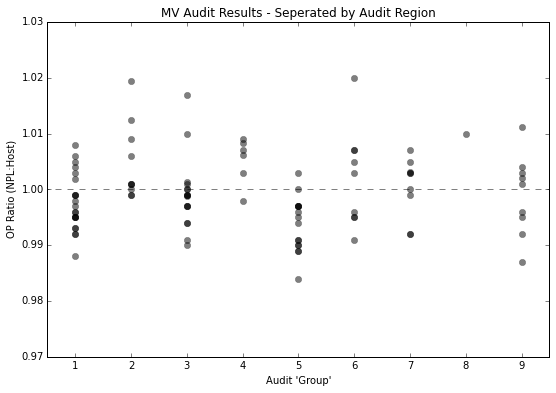

In [12]:
fig = plt.figure(1, figsize=(9,6))

ax = fig.add_subplot(111)
ax.set_xticks([1,2,3,4,5,6,7,8,9])

one = plt.plot([0,10],[1,1], '--', color='black', alpha=0.5) #add line for OPratio=1

for i in range(0, len(grouped)):
    scat = plt.plot(np.linspace(i+1,i+1,len(grouped[i])), grouped[i], u'o', color='black', alpha=0.5, linewidth=2)

plt.xlim(0.5,9.5)
plt.ylim(0.97,1.03)
plt.title('MV Audit Results - Seperated by Audit Region')
plt.xlabel("Audit 'Group'")
plt.ylabel("OP Ratio (NPL:Host)")

##### can add box plot over the top by uncommenting the below line

#bp = ax.boxplot(grouped, whis='range', patch_artist=True, showmeans=True)

for box in bp['boxes']:
    box.set(facecolor='grey')
    
for whisker in bp['whiskers']:
    whisker.set(linestyle='-', color='black') 
    
for median in bp['medians']:
    median.set(color='black')
    
for mean in bp['means']:
    mean.set(marker='o', color='black', markerfacecolor='black')
    
#plt.savefig('NPL_Paper_Plots/NPL_MV_All_Groups_Scat.png', bbox_inches='tight', dpi=300)